In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("high_diamond_ranked_10min.csv")

This is a dataset which shows the first 10 minutes of a specific 5v5 online game called 'League of Legends'. There are just under 10,000 games in the set, all of which being at a highly competitive level (very high ranking individuals, all at roughly the same level). 

The first 10 minutes of each game highly dictates the outcome of the game - but to what degree?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [6]:
df.isnull().sum()
#no nulls

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [7]:
df.head()
#blue wins is our binary target, either 1 or 0

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [10]:
#checking the balance between wins and losses
df["blueWins"].value_counts()
#extremely even ratio

0    4949
1    4930
Name: blueWins, dtype: int64

In [14]:
df.groupby("blueWins").mean().transpose()
#checking the evenness of the other attributes
#the winning team has slightly higher positive stats
#within the first 10 minutes, and slightly lower negative ones

#with the following stats contributing more significantly:
#firstblood, kills, assists, elitemosters, dragons, heralds, towers, gold

#we can also observe that the following make only a slight difference:
#wardsplaced, minionskilled, CSpermin

blueWins,0,1
gameId,4.500057e+09,4.500111e+09
blueWardsPlaced,2.228672e+01,2.228986e+01
blueWardsDestroyed,2.728834e+00,2.921298e+00
blueFirstBlood,4.041220e-01,6.058824e-01
blueKills,5.170135e+00,7.201623e+00
blueDeaths,7.131138e+00,5.140365e+00
blueAssists,5.522732e+00,7.771805e+00
blueEliteMonsters,4.113962e-01,6.890467e-01
blueDragons,2.594464e-01,4.649087e-01
blueHeralds,1.519499e-01,2.241379e-01


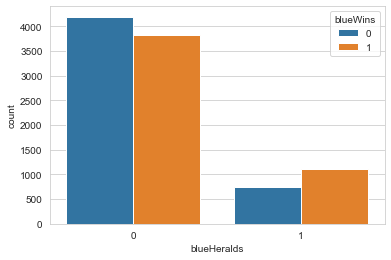

In [24]:
sns.countplot("blueHeralds", data=df, hue="blueWins")
#claiming the herald increases winrate

In [24]:
blue_her = df[df["blueWins"]==1]["blueHeralds"].sum() / len(df)
red_her = df[df["blueWins"]==0]["redHeralds"].sum() / len(df)
blue_her + red_her
#21% of all games won when claiming the herald

0.20983905253568175

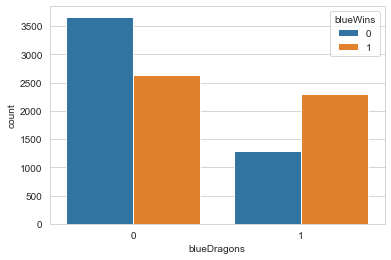

In [23]:
sns.countplot("blueDragons", data=df, hue="blueWins")
#claiming dragons increases winrate more than herald

In [25]:
blue_drag = df[df["blueWins"]==1]["blueDragons"].sum() / len(df)
red_drag = df[df["blueWins"]==0]["redDragons"].sum() / len(df)
blue_drag + red_drag
#49% of all games won when claiming dragon

0.49053547929952424

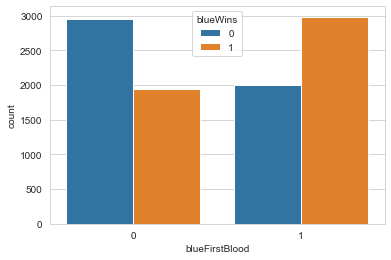

In [42]:
sns.countplot("blueFirstBlood", data=df, hue="blueWins")
#claiming firstblood increases winrate

In [26]:
blue_fb = df[df["blueWins"]==1]["blueFirstBlood"].sum() / len(df)
red_fb = df[df["blueWins"]==0]["redFirstBlood"].sum() / len(df)
blue_fb + red_fb
#60% of all games won when claiming firstblood

0.6008705334548031

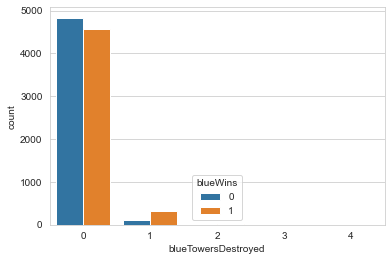

In [45]:
sns.countplot("blueTowersDestroyed", data=df, hue="blueWins")

In [64]:
blue_td = df[df["blueWins"]==1]["blueTowersDestroyed"].sum() / len(df[df["blueTowersDestroyed"]>0]["blueTowersDestroyed"])
red_td = df[df["blueWins"]==0]["redTowersDestroyed"].sum() / len(df[df["redTowersDestroyed"]>0]["redTowersDestroyed"])
(blue_td + red_td) / 2
#an 83% winrate if that team destroyed 1 or more towers by 10mins

0.8325822884012539

In [74]:
#where the team wins + has a dragon + has firstblood
blue_dfb = len(df[(df["blueWins"]==1) & (df["blueDragons"]==1) & (df["blueFirstBlood"]==1)])
red_dfb = len(df[(df["blueWins"]==0) & (df["redDragons"]==1) & (df["redFirstBlood"]==1)])
avg_dfb = (blue_dfb + red_dfb) / 2

avg_wins = (df["blueWins"].value_counts()[0] + df["blueWins"].value_counts()[1]) / 2
avg_dfb / avg_wins
#31.8% of all games won when claiming dragon + firstblood

0.31845328474541956

# Dense Model (model #1/4)

### Split

In [3]:
#dropping gameId as it is not relevant for the model
df.drop("gameId", axis=1, inplace=True)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop("blueWins", axis=1).values
y = df["blueWins"].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25)

### Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Base model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [11]:
X_train_scaled.shape

(7409, 38)

In [12]:
model = Sequential()

model.add(Dense(39, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(22, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(8, activation="relu"))

model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam")

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
early_stop = EarlyStopping(monitor="val_loss", patience=4)

In [15]:
model.fit(X_train_scaled, y_train,
          validation_data=(X_test_scaled, y_test),
         epochs=200, callbacks=[early_stop])

Epoch 1/200
232/232 [==============================] - 0s 1ms/step - loss: 0.6264 - val_loss: 0.5654
Epoch 2/200
232/232 [==============================] - 0s 820us/step - loss: 0.5666 - val_loss: 0.5538
Epoch 3/200
232/232 [==============================] - 0s 815us/step - loss: 0.5536 - val_loss: 0.5494
Epoch 4/200
232/232 [==============================] - 0s 867us/step - loss: 0.5467 - val_loss: 0.5599
Epoch 5/200
232/232 [==============================] - 0s 854us/step - loss: 0.5446 - val_loss: 0.5478
Epoch 6/200
232/232 [==============================] - 0s 833us/step - loss: 0.5440 - val_loss: 0.5479
Epoch 7/200
232/232 [==============================] - 0s 833us/step - loss: 0.5374 - val_loss: 0.5483
Epoch 8/200
232/232 [==============================] - 0s 815us/step - loss: 0.5387 - val_loss: 0.5461
Epoch 9/200
232/232 [==============================] - 0s 820us/step - loss: 0.5371 - val_loss: 0.5470
Epoch 10/200
232/232 [==============================] - 0s 811us/step - los

In [16]:
metrics = pd.DataFrame(model.history.history)

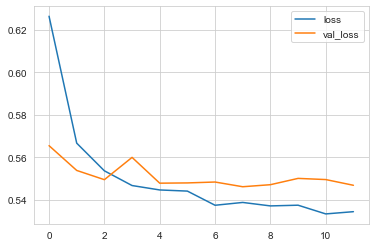

In [17]:
metrics.plot()

In [18]:
predictions = (model.predict(X_test_scaled) > 0.5).astype("int32")

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
confusion_matrix(y_test, predictions)

array([[1000,  251],
       [ 442,  777]], dtype=int64)

In [21]:
print(classification_report(y_test, predictions))
#model predicts with 74% precision if the game will be won
#based on the first 10 mins

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1251
           1       0.76      0.64      0.69      1219

    accuracy                           0.72      2470
   macro avg       0.72      0.72      0.72      2470
weighted avg       0.72      0.72      0.72      2470



# Basic RandomForest Model (model #2/4)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = RandomForestClassifier()

In [24]:
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [25]:
rfc_predictions = rfc.predict(X_test_scaled)

In [26]:
confusion_matrix(y_test, rfc_predictions)

array([[894, 357],
       [365, 854]], dtype=int64)

In [27]:
print(classification_report(y_test, rfc_predictions))
#essentially same results as the custom basic DropoutDense model

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1251
           1       0.71      0.70      0.70      1219

    accuracy                           0.71      2470
   macro avg       0.71      0.71      0.71      2470
weighted avg       0.71      0.71      0.71      2470



# GridSearch RandomForest Model (model #3/4)

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {"n_estimators": [100, 200, 300],
              "max_depth": [None, 10, 20, 60, 80],
              "min_samples_split": [2, 6, 8, 10, 12],
              "min_samples_leaf": [1, 2, 4],
              "max_features": ["auto", "sqrt"]}

In [30]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid=param_grid,
                   verbose=1)

In [ ]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
grid.best_params_

In [ ]:
grid_model = grid.best_estimator_

In [ ]:
grid_predictions = grid_model.predict(X_test_scaled)

In [ ]:
confusion_matrix(y_test, grid_predictions)

In [ ]:
print(classification_report(y_test, grid_predictions))

# GridSearch SVC Model (model #4/4)

In [11]:
from sklearn.svm import SVC

In [12]:
param_grid = {"C": [0.1, 1, 10, 100, 1000],
             "gamma": [1, 0.1, 0.01, 0.001, 0.0001]}

In [15]:
svc_grid = GridSearchCV(SVC(), param_grid=param_grid, verbose=3)

In [16]:
svc_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.721, total=   4.7s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.737, total=   5.7s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.3s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.723, total=   5.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.718, total=   4.6s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.712, total=   6.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.731, total=   6.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.733, total=  10.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.725, total=   6.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.721, total=   9.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.729, total=   6.4s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.742, total=   6.5s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.727, total=   6.4s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.731, total=   6.3s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.717, total=   6.4s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.733, total=   6.8s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.735, total=   7.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] ................. C=1000, gamma=0.001, score=0.726, total=   6.9s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.718, total=   6.8s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.734, total=   6.8s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.745, total=   6.8s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.731, total=   6.8s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.726, total=   6.7s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.713, total=   6.7s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 20.3min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [17]:
svc_grid.best_params_

{'C': 100, 'gamma': 0.001}

In [18]:
svc_model = svc_grid.best_estimator_

In [19]:
svc_predictions = svc_model.predict(X_test_scaled)

In [20]:
confusion_matrix(y_test, svc_predictions)

array([[925, 322],
       [340, 883]], dtype=int64)

In [21]:
print(classification_report(y_test, svc_predictions))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1247
           1       0.73      0.72      0.73      1223

    accuracy                           0.73      2470
   macro avg       0.73      0.73      0.73      2470
weighted avg       0.73      0.73      0.73      2470

